# Online Game Store ICE #

<b> Project description </b>

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

### Table of content

* [Data initial inspection](#first)
* [Data preprocessing](#second)
* [Data analysis](#three)
* [Overall conclusion](#fourth)

 ### <a id='first'></a> Data initial inspection ###

In [56]:
#importing relevant library and modules to be used later on
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
import scipy.stats as stats
from scipy.stats import shapiro
from scipy import stats as st
import seaborn as sb

In [57]:
#loading the data from csv file
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [58]:
#getting some initial statistics
games.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


#### Conclusion
We have imported the libraries and modules needed to analyse the data and opened the dataset. Our dataset has 16715 rows and 11 columns. We can see that some columns have less data than 16715, which we will need to investigate further and decide what we will do with those missing values. We can also see that many of the data (`year_of_release`, `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `critic_score`) are float, and some should be convereted to integers.

We also conducted some initial statistical examination od the data. We have some mising values and odd values in the column `user_score` - data point `tbd` meaning to be determined, which can be considered as a missing value, is a top data point, thus a quite big proportion of the dataset. We need to see later how to handle this in order to produce statistically correct results. We can see that the most frequent game in our dataset is `Need for Speed: Most Wanted`, the most popular `platform` is `PS2` and `action` as `genre`.

 ### <a id='second'></a>  Data preprocessing ###

In [59]:
#Replace the column names (make them lowercase)
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [60]:
# check and deal with missing values:
# Explain why you filled in the missing values as you did or why you decided to leave them blank
# Why do you think the values are missing? Give possible reasons

percent = games.isnull().sum()*100/len(games)
print(round(percent,2))

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64


In [61]:
#dropping the small proporation of missing values as it is hard to guess them 
games.dropna(subset = ["name", "year_of_release"], inplace = True)

In [62]:
#filling the missing values
games['genre'] = games.groupby('platform').genre.transform(lambda x: x.fillna(x.mode()[0]))

0.08554919384758512

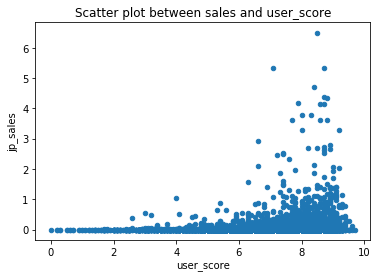

In [63]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

games_no_tda = games.drop(games.index[games['user_score'] == 'tbd']) #cheking for a correlation between user_score and sales to decide if we can fill in tda by combining this
games_no_tda['user_score'] = games_no_tda['user_score'].apply(pd.to_numeric)
games_no_tda.plot.scatter(x='user_score', y='jp_sales', title= "Scatter plot between sales and user_score");
games_no_tda['user_score'].corr(games_no_tda['na_sales'])

#As there is very weak correlation, maybe we should not fill the tda value

In [64]:
#replacing the `tbd`('to be determined') meaning the minimum review of a certain product was not yet reached, with NaN
games['user_score'].replace('tbd', np.NaN, inplace=True)
games['user_score'] = games['user_score'].astype(float)

In [65]:
#replacing the nan in `rating` with `undefined` as this is a categorical variable
games['rating'] = games['rating'].replace(np.NaN, 'undefined') 

In [66]:
#Convert the data to the required types.
#Describe the columns where the data types have been changed and why.
games['year_of_release'] = games['year_of_release'].astype(int)

In [67]:
#Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
games['sum_sales'] = games[['na_sales','jp_sales', 'eu_sales', 'other_sales']].sum(axis=1)

#### Conclusion 

We first changed all the column labels to lower case. We then checked for the exact proportion of missing data in each of the columns. In fact, we do not know why the data in these columns is missing (we can only hypothesize), and we do not have access to a source that would allow us to replenish the data, restore it, so it is better drop missing values when there are only few, but keep rows with missing values in the data in order to not lose important information or simply replace them with indicators where appropriate. 

We have relatively small part of missing values in the columns `name`, `year_of_release`, and `genre`. As for columns `name` or `year_of_release` we dropped them, as it is hard to guess the correct data. 

We then changed the float to ineteger for the `year_of_release` column.  The reasons for those to be converetd to integers is that in these cases floating point values have no meaning as a count. Another reason to favour integers over floats is performance and efficiency. Integer arithmetic is faster. And for a given range integers consume less memory because integers don't need to represent non-integer values. and we created a new column which sumarizes the sells from different regions. 

The missing values in the column `genre` are filled with the mode (the value that appears the most commonly observed value in the particular column, however taking into consideration the platform or genre. This means we combined information from the columns, in order to come to better values that are not the same for each missing datapoint. 

However things get more complicated when we look at the three columns that refer to the reviews.  With over 40% missing values in each, we can not just fill them with means/medians as that will distore our results in the end. We did not find high dependancy of `user_cores` and `sales`, therefore we will not fill in other ways, because we face the risk of distortion of the original data. Will leave them to appear as NaNs and we will make sure to exlude those rows in some parts of the analysis. We will not delete from the dataset as we do not want to lose valuable data points. We replaced `tbd` with `Nan`, but we will exclude the missing values in this particular column when the analysis focuses on them. We also created a new sub-group called `undefined`, to where we assigned all the missing values from the `rating` column. 

We calculated the `sum_sales` of all regions and added this as a new column to the our dataframe. 

### <a id='three'>  Data analysis </a> ###  

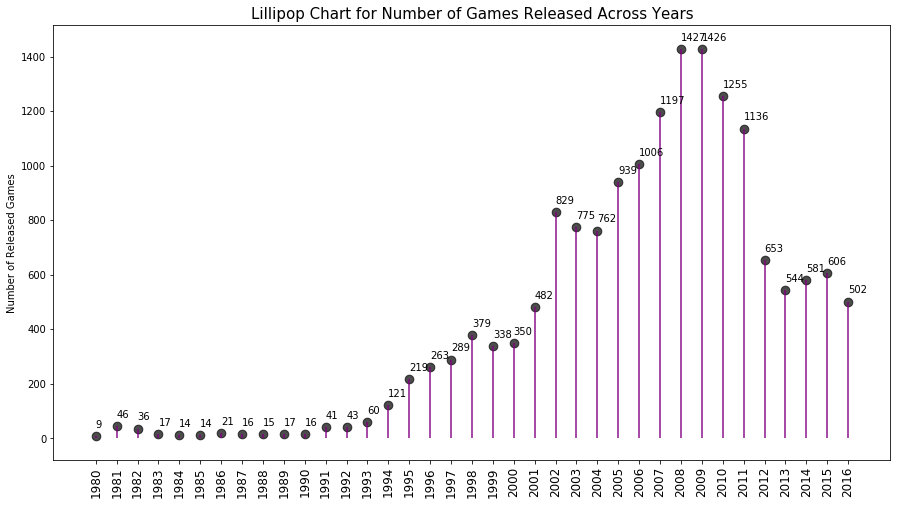

In [68]:
#Look at how many games were released in different years. Is the data for every period significant?

games_years = games.groupby('year_of_release')['name'].count().reset_index()

fig,ax = plt.subplots(figsize=(15,8))
ax.vlines(x=games_years.year_of_release, ymin=0, ymax=games_years.name, color='purple',alpha=0.7,linewidth=2)
ax.scatter(x=games_years.year_of_release, y=games_years.name, s=75, color='black', alpha=0.7);

ax.set_title("Lillipop Chart for Number of Games Released Across Years", fontdict={'size':15});
ax.set_ylabel('Number of Released Games');
ax.set_xticks(games_years.year_of_release);
ax.set_xticklabels(games_years.year_of_release,rotation=90, fontdict={'horizontalalignment': 'center', 'size':12});

for row in games_years.itertuples():
    ax.text(row.year_of_release, row.name+30, s=round(row.name,2))

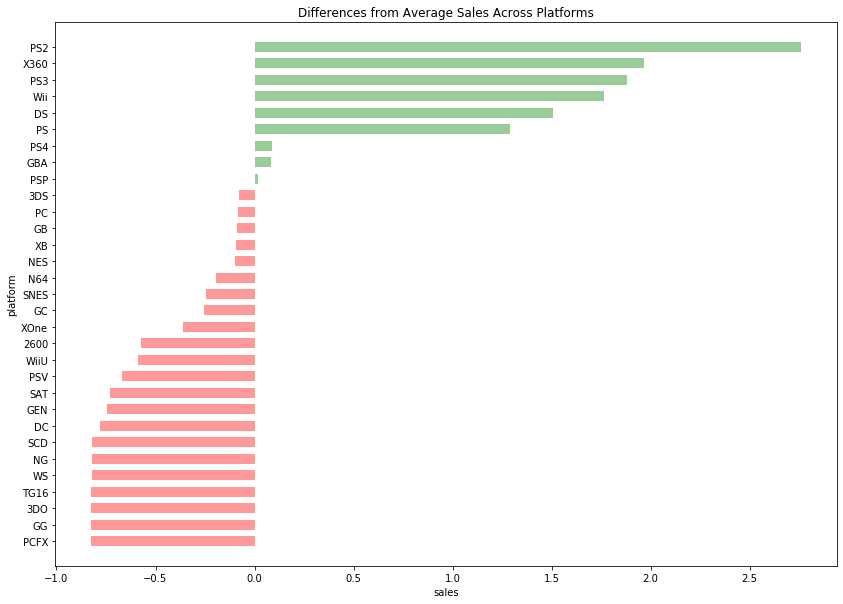

In [69]:
#Look at how sales varied from platform to platform. 
games_platform = games.groupby('platform')['sum_sales'].sum().sort_values().reset_index()
games_platform['sales_z'] = (games_platform['sum_sales'] - games_platform['sum_sales'].mean())/games_platform['sum_sales'].std() #calculating z to see if the platforms are successful. 

# If sales_z has a positive number then it is successful and we assign colour green to that row, otherwise red
games_platform['colour_z'] = ['red' if x<0 else 'green' for x in games_platform['sales_z']]

# graphically presenting the results 
plt.figure(figsize=(14,10))
plt.hlines(y=games_platform.platform,xmin=0, xmax=games_platform.sales_z,color=games_platform.colour_z, alpha=0.4, linewidth=10);
plt.xlabel('sales'); 
plt.ylabel('platform'); 
plt.title("Differences from Average Sales Across Platforms");

##The green ones are above the mean, and the leading by totalis PS2. 

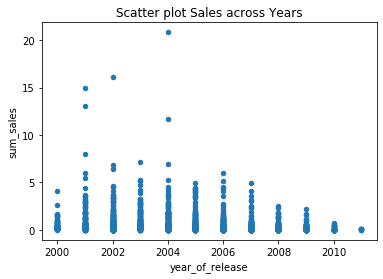

In [70]:
#Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
ps2  = games[games['platform'] == 'PS2']
ps2.plot.scatter(x='year_of_release', y='sum_sales', title= "Scatter plot Sales across Years");

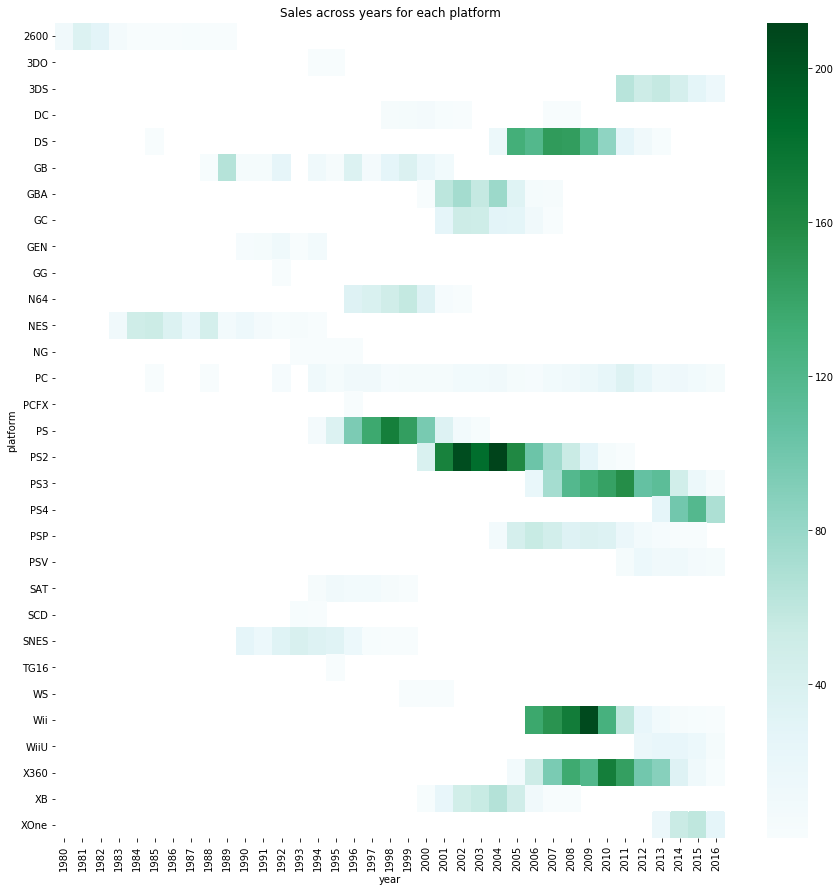

In [71]:
#Find platforms that used to be popular but now have zero sales
#How long does it generally take for new platforms to appear and old ones to fade?
popular_platforms = games.groupby(["platform", 'year_of_release'])['sum_sales'].sum().reset_index()

heatmap_popular = pd.pivot_table(popular_platforms, values='sum_sales', 
                     index=['platform'], 
                     columns='year_of_release')

plt.figure(figsize=(15, 15))
sb.heatmap(heatmap_popular, cmap="BuGn");
plt.xlabel('year'); 
plt.ylabel('platform'); 
plt.title("Sales across years for each platform");

In [72]:
#Determine what period you should take data for
#To do so, look at your answers to the previous questions 
#The data should allow you to build a prognosis for 2017.

The first years up to 1993, the number od games released were relatively small compared to later years. The most fruitful years were between 2007 and 2011 inclusive. However, from 2012 and onwards, the number of games halfed. 

The platform with the biggest sale was `PS2` with total sale of 1255.77. From the scatter plot above, we saw that on this plaform `PS2`, the sales were the higest between 2001 and 2006, which some very high total sales in 2004. However, we noticed a steady decline starting from 2006 and onwards. 

From the heatmap we saw that te platforms that had higher sales, but which has decreased over time are: `WiiU`, `X360`, `PS`, `PS2`, `PS3` and `DS`, as judged by the darker colours in the left, that fades as moving towards the right (more recent years). 

If we take the different version of `PS`, then it takes about 10 years for an old platform to fade, and about 6-7 years from the existance of an older version, for a new to appear. This means that the relevance of the game falls,  on average for 3-4 years (since games quickly become obsolete, although they can continue to be sold in stores), according to the charts.

Based on the heatmaps, as well as the table on sales for different years, sales has picked up after 1994, but decrased after 2011. The average life expectancy of a game is about 10 years, and we need to predict for 2017, therefore we can exlude the years before, but having in mind that number of relased games decreased after 2011, and that the relevance of the game falls according to the charts on average for 3-4 years, we can work with data from 2012 and onwards. 

In [73]:
#Work only with the data that you've decided is relevant. Disregard the data for previous years.
games_2012 = games.loc[games['year_of_release'] >= 2012] #creating a new subset
games_2012['year_of_release'].min() #checking whether we have data before 2012

2012

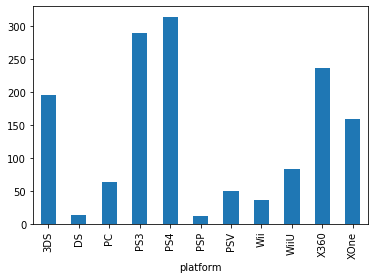

In [74]:
#Which platforms are leading in sales? 
games_2012.groupby('platform')['sum_sales'].sum().plot.bar();

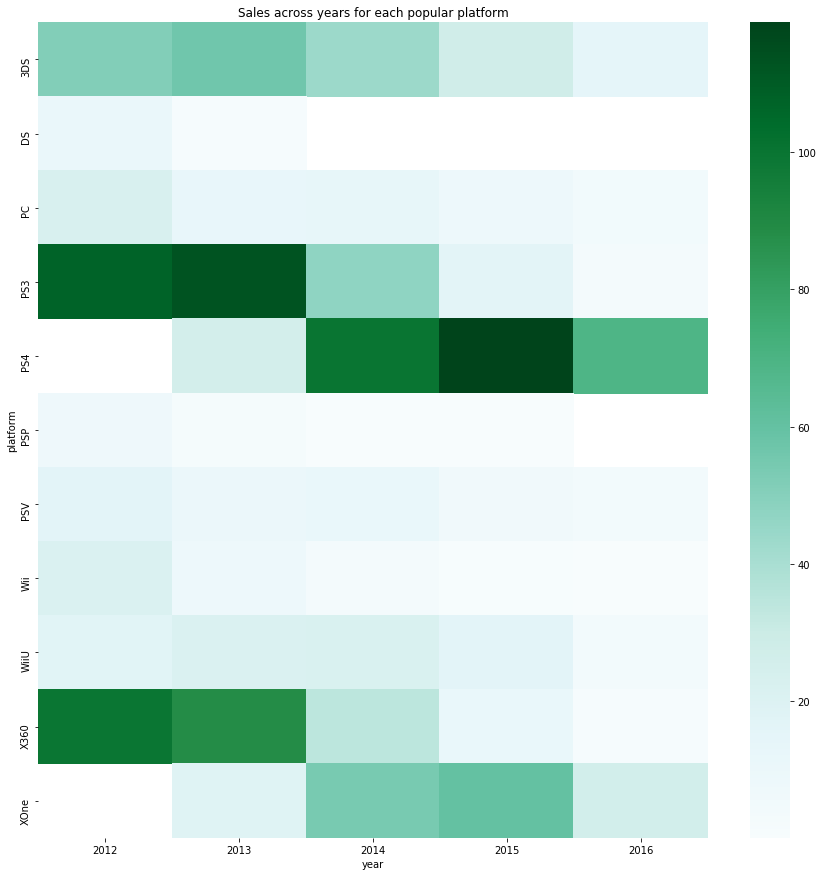

In [102]:
#Which ones are growing or shrinking? 
#Select several potentially profitable platforms.

games_2012_grouped = games_2012.groupby(['platform', 'year_of_release'])['sum_sales'].sum().reset_index()
pivot_2012 = pd.pivot_table(games_2012_grouped, values='sum_sales', 
                     index=['platform'], 
                     columns='year_of_release')


plt.figure(figsize=(15, 15))
sb.heatmap(pivot_2012, cmap="BuGn");
plt.xlabel('year'); 
plt.ylabel('platform'); 
plt.title("Sales across years for each popular platform");

From the above barchart, we can see that platforms such as `PS3`, and `WX360`, are leading in sales, but from the heatmap, also clearly shrinking. Platforms that is growing is `PS4`. Based on this potential profitable platforms would be`P4` given the fact they have not reached the max length od popularity compared to their predecessors. Also maybe `XONE` as it is the start, it may pick up later; similarly behaves `3DS`. 

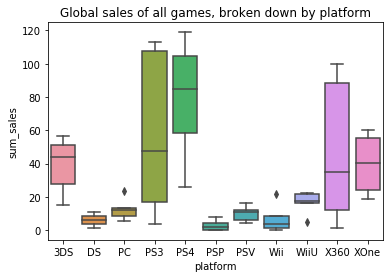

In [118]:
#Build a box plot for the global sales of all games, broken down by platform. 
#Are the differences in sales significant? 
#What about average sales on various platforms? Describe your findings.
import seaborn as sns

ax = sns.boxplot(x="platform", y="sum_sales", data=games_2012_grouped).set_title('Global sales of all games, broken down by platform')

From the boxplot above, we can see that are on average, there are relativley large differences in sales across platforms. Looking at the median, we can see that, the highest sales are notices for `PS3` and `PS4`. The wider ranges of sales are for `PS3` and `X360`, which also have the higest overall ranges. 

In [77]:
games_no_nan= games_2012.dropna()
percent = games_no_nan.isnull().sum()*100/len(games_no_nan)
print(round(percent,2))

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
sum_sales          0.0
dtype: float64


The correlation coefficient between sales and critic score is: 0.40589480145836687
The correlation coefficient between sales and user score is: -0.03362497596528878


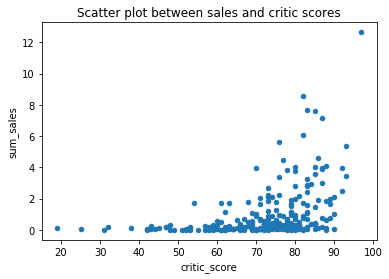

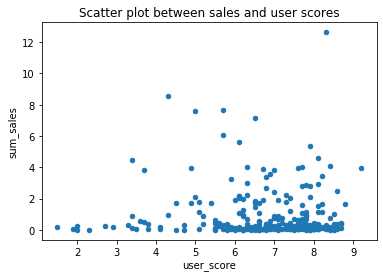

In [78]:
#Take a look at how user and professional reviews affect sales for one popular platform (you choose)
#Build a scatter plot and calculate the correlation between reviews and sales 
#Draw conclusions

ps4_corre = games_2012[games_2012['platform'] == "PS4"].dropna() # taking only one popular platform

#critic score
critic_sales = ps4_corre['critic_score'].corr(ps4_corre['sum_sales'])
print('The correlation coefficient between sales and critic score is:',  critic_sales)
ps4_corre.plot.scatter(x='critic_score', y='sum_sales', title= "Scatter plot between sales and critic scores");


#user_score
user_sales = ps4_corre['user_score'].corr(ps4_corre['sum_sales'])
print('The correlation coefficient between sales and user score is:',  user_sales)
ps4_corre.plot.scatter(x='user_score', y='sum_sales', title= "Scatter plot between sales and user scores");

There is a moderate positive correlation between sale and critic scores, and no linear correlation between sale and user score. It seems that professional reviews affect sales to a larger extent, compared to reviews from users. 

The correlation coefficient between sales and critic score is: 0.3310566175801407
The correlation coefficient between sales and user score is: 0.0032274054930356844


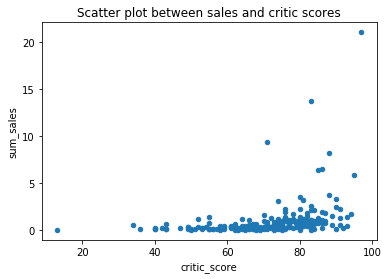

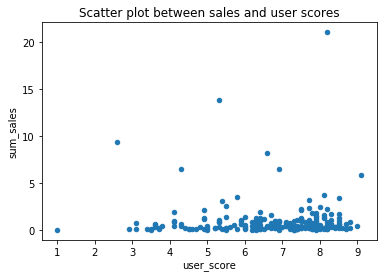

In [79]:
#Keeping your conclusions in mind, compare the sales of the same games on other platforms.

games_min_2_platforms = games_2012.groupby(['name']).filter(lambda x: x['platform'].count() >= 2)  #games appear more than in one platform
games_min_2_platforms = games_min_2_platforms.groupby(['name']).filter(lambda x: (x['platform'] == "PS4").sum() == 1) #games appear on platform PS4
games_min_2_platforms.groupby(["name", "platform"]).count().reset_index()

ps3_corre = games_2012[games_2012['platform'] == "PS3"].dropna() # taking another platform

#critic score
critic_sales = ps3_corre['critic_score'].corr(ps3_corre['sum_sales'])
print('The correlation coefficient between sales and critic score is:',  critic_sales)
ps3_corre.plot.scatter(x='critic_score', y='sum_sales', title= "Scatter plot between sales and critic scores");


#user_score
user_sales = ps3_corre['user_score'].corr(ps3_corre['sum_sales'])
print('The correlation coefficient between sales and user score is:',  user_sales)
ps3_corre.plot.scatter(x='user_score', y='sum_sales', title= "Scatter plot between sales and user scores");

The correlation coefficient between sales and critic score is: 0.36057348885073354
The correlation coefficient between sales and user score is: -0.0020140394826897922


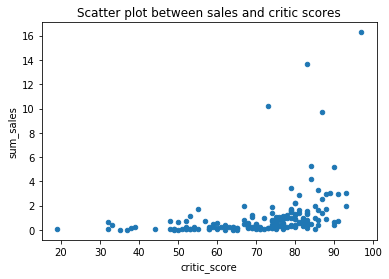

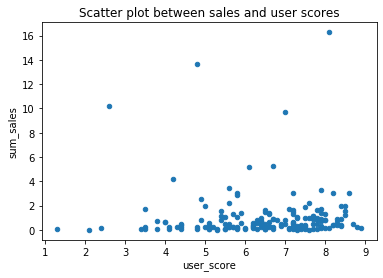

In [80]:
# taking another platform
x360_corre = games_2012[games_2012['platform'] == "X360"].dropna() 

#critic score
critic_sales = x360_corre['critic_score'].corr(x360_corre['sum_sales'])
print('The correlation coefficient between sales and critic score is:',  critic_sales)
x360_corre.plot.scatter(x='critic_score', y='sum_sales', title= "Scatter plot between sales and critic scores");


#user_score
user_sales = x360_corre['user_score'].corr(x360_corre['sum_sales'])
print('The correlation coefficient between sales and user score is:',  user_sales)
x360_corre.plot.scatter(x='user_score', y='sum_sales', title= "Scatter plot between sales and user scores");

We found that games that appear on PS4, also appear on PS3 and X360. We calculated correlation between `user_score` and `sale` on this platforms and found almost no correlation. This is similar to the results we got for patform PS4. For all the three paltforms, we found postive moderate relationship between `critic_score and `sale`.

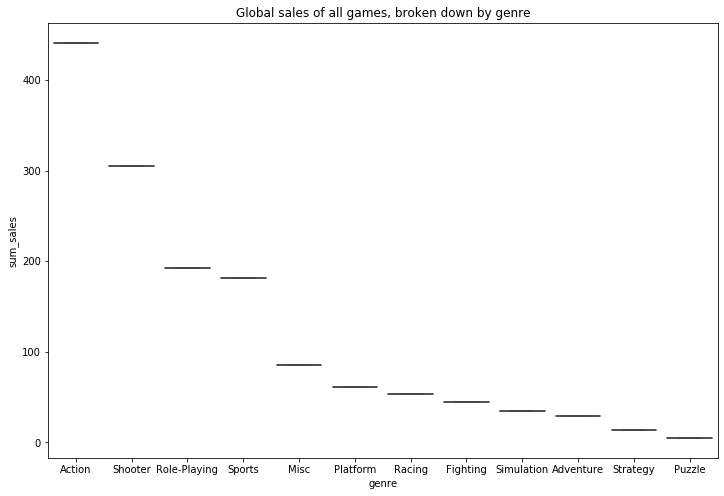

In [127]:
#Take a look at the general distribution of games by genre. 
#What can we say about the most profitable genres? 
#Can you generalize about genres with high and low sales?

sales_genre_grouped = games_2012.groupby('genre')['sum_sales'].sum().reset_index()
sales_genre_grouped.sort_values('sum_sales', ascending=False, inplace=True)

#fig = px.box(sales_genre_grouped,x="genre", y="sum_sales", title = 'Global sales of all games, broken down by genre')
#fig.show();

fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x="genre", y="sum_sales", ax=ax, data=sales_genre_grouped).set_title('Global sales of all games, broken down by genre')

#### Conclusion

In the above analysis we checked the number of games released every year and found out that the number of games released were relatively small compared to later years. The most fruitful years have been between 2007 and 2011 inclusive.  We also found out that the `platform` with the biggest sale is `PS2`, whose sales were the highest between 2001 and 2006. We also saw that `platforms` such as `WiiU`, `X360`, `PS`, `PS2`, `PS3`, `PS4`, and `DS` used to have higher sales, which has decreased over time. We also saw  that platforms such as `PS2`, `PS3`, `Wii`, `DS`, `WX360`, are leading in sales, but also clearly shrinking. 

Looking at the different version of `PlayStation`, then it takes about 10 years for an old platform to fade, and about 6-7 years from the existence of an older version, for a new to appear. Based on the whole data and the fact that sales has picked up since 1994, but then slowed down after 2011, we decided to exclude the years before 2012. 


From the barchart, we can see that the `platform` that is growing is `PS4`. Based on this, potential profitable platforms would be`P4` given the fact it has not reached the max length of popularity compared to its predecessors. Also maybe `XONE` as it is the start, it may pick up later; similarly behaves `3DS`. 

Our analysis further found that that are relatively large differences in sales across platforms. Looking at the median, we can see that, the highest sales are notices for PS3 and PS4. The wider ranges of sales are for PS3 and X360, which also have the higest overall ranges.

It seems that professional reviews affect sales to a larger extent, compared to reviews from users. There is a moderate positive correlation between sale and critic scores, and no linear correlation between `sale` and `user score`. These results hold for the three paltforms that we investigated. 

The top two most profitable genres are `Action`, and `Shooter`. These are games that emphasize physical and tactical challenges, precision and accuracy, spatial awareness, reflexes, and speed. On the other hand, the lowest sales were recorded for puzzle and startegy. These genres, in contrast to the top three genres, focus on skilfull logicalm startgeical and tactical thinking and planning.

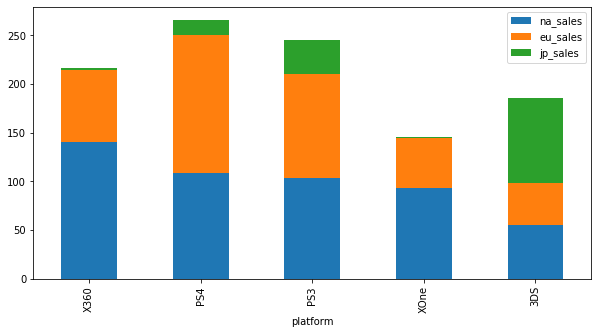

,na_sales,eu_sales,jp_sales
platform,,,
X360,140.05,74.52,1.57
PS4,108.74,141.09,15.96
PS3,103.38,106.86,35.29
XOne,93.12,51.59,0.34
3DS,55.31,42.64,87.79


In [82]:
#Create a user profile for each region
#For each region (NA, EU, JP), determine:
#The top five platforms. Describe variations in their market shares from region to region.

platform_region = games_2012.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#North America
top_na = platform_region.sort_values('na_sales', ascending=False).head(5)
top_na.plot.bar(stacked=True, figsize=(10, 5))
plt.show()

platform_region.nlargest(5, ['na_sales'])

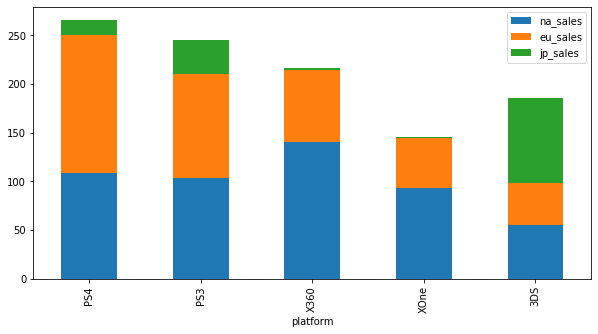

,na_sales,eu_sales,jp_sales
platform,,,
PS4,108.74,141.09,15.96
PS3,103.38,106.86,35.29
X360,140.05,74.52,1.57
XOne,93.12,51.59,0.34
3DS,55.31,42.64,87.79


In [83]:
#Europe

top_eu = platform_region.sort_values('eu_sales', ascending=False).head(5)
top_eu.plot.bar(stacked=True, figsize=(10, 5))
plt.show()

platform_region.nlargest(5, ['eu_sales'])

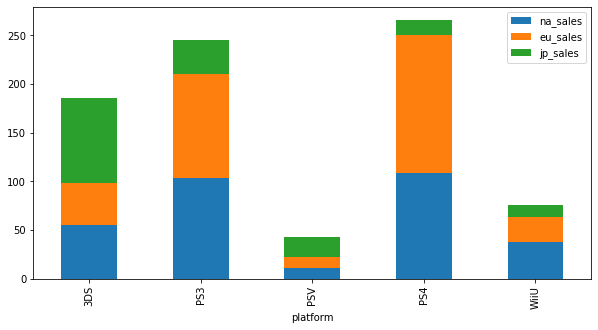

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
PS3,103.38,106.86,35.29
PSV,10.98,11.36,21.04
PS4,108.74,141.09,15.96
WiiU,38.10,25.13,13.01


In [84]:
#Japan

top_jp = platform_region.sort_values('jp_sales', ascending=False).head(5)
top_jp.plot.bar(stacked=True, figsize=(10, 5))
plt.show()


platform_region.nlargest(5, ['jp_sales'])

According to the tables and stacked barc charts above, platform, `X360` has the higest sale in North America, it appears as third in the EU region, while it does not appear in the top five in Japan. `PS4`is the top sales performer in Europe, and appareas as second in North America, and fourth in Japan. The top in Japan is `3DS` which apeears as fifth in North America and Europe.

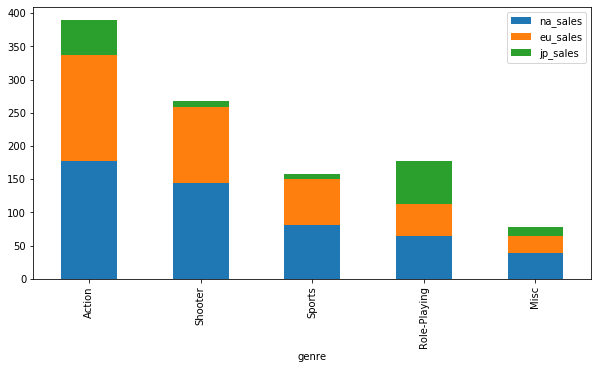

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,9.23
Sports,81.53,69.09,8.01
Role-Playing,64.00,48.53,65.44
Misc,38.19,26.32,12.86


In [85]:
#For each region (NA, EU, JP) determine the top five genres. Explain the difference.

genre_region = games_2012.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#North America
top_genre_na = genre_region.sort_values('na_sales', ascending=False).head(5)
top_genre_na.plot.bar(stacked=True, figsize=(10, 5))
plt.show()

genre_region.nlargest(5, ['na_sales'])

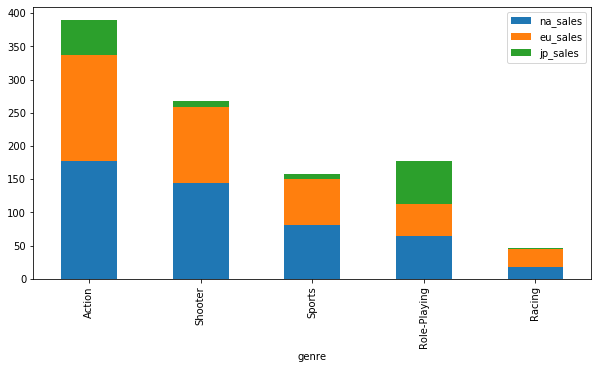

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,9.23
Sports,81.53,69.09,8.01
Role-Playing,64.00,48.53,65.44
Racing,17.22,27.29,2.50


In [86]:
#Europe
top_genre_eu = genre_region.sort_values('eu_sales', ascending=False).head(5)
top_genre_eu.plot.bar(stacked=True, figsize=(10, 5))
plt.show()

genre_region.nlargest(5, ['eu_sales'])

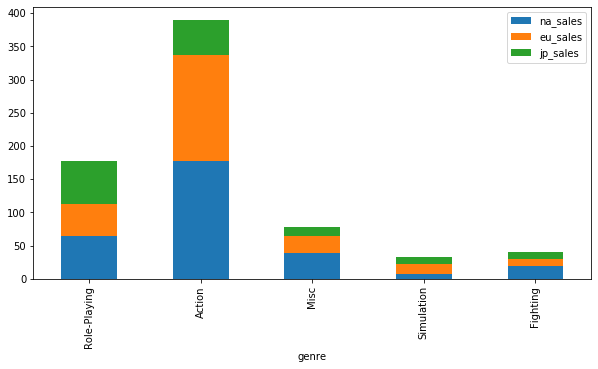

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,64.00,48.53,65.44
Action,177.84,159.34,52.80
Misc,38.19,26.32,12.86
Simulation,7.97,14.55,10.41
Fighting,19.79,10.79,9.44


In [87]:
#Japan
top_genre_jp = genre_region.sort_values('jp_sales', ascending=False).head(5)
top_genre_jp.plot.bar(stacked=True, figsize=(10, 5))
plt.show()


genre_region.nlargest(5, ['jp_sales'])

From the three tables below, we can see that in terms of genre, the top five in Europe and North America are pretty similar. The only diffeence is that `racing` apears as 5th in Europe, while the 5th in North America is `misc`. In Japan however, the top genre is `role-playing` which appears as 4th in the two other regions. The top two genre (`Action`) in North America and Europe, also appear in Japan as 2nd. 

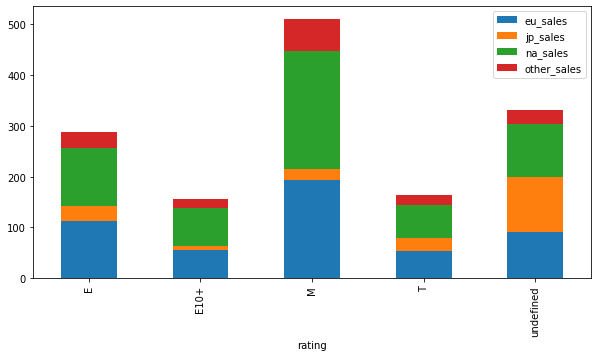

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,113.03,28.33,114.37,31.44
E10+,55.37,8.19,75.70,16.23
M,193.96,21.20,231.57,63.38
T,52.96,26.02,66.02,17.94
undefined,91.50,108.84,103.31,27.17


In [88]:
#Do ESRB ratings affect sales in individual regions?

esrb_sales = games_2012.pivot_table(index='rating', 
                       values=['eu_sales', 'jp_sales', 'na_sales', 'other_sales'], 
                       aggfunc='sum')

esrb_sales.plot.bar(stacked=True, figsize=(10, 5))
plt.show()

esrb_sales 

The results suggest that `E` and `M` ESRB ratings affect the most sales in Europe and North America. In `Japan` those gamees for which we have no ESRB raatings at all, record the highest sales. 

#### Conclusions

According to the tables and stacked bar charts above, platform `X360` has the higest sale in North America, it appears as third in the EU region, while it does not appear in the top five in Japan. `PS4` is the top sales performer in Europe, and appareas as second in North America, and fourth in Japan. The top in Japan is `3DS` which apeears as fifth in North America and Europe.

In terms of genre, the top five in Europe and North America are pretty similar. The only diffeence is that racing apears as 5th in Europe, while the 5th in North America is misc. In Japan however, the top genre is role-playing which appears as 4th in the two other regions. The top two genre (Action) in North America and Europe, also appear in Japan as 2nd.

When it comes to ESRB ratings,  the results suggest that `E` and `M` ESRB ratings affect the most sales in Europe and North America. In Japan those gamees for which we have no ESRB ratings at all, record the highest sales.

##### Testing hypotheses ####

1st part:  As H₀ is always stated with an equal sign, in our analysis with the null hypothesis we need to check that there’s no difference between average user ratings of the Xbox One and PC platforms. 

2nd part:  As H₀ is always stated with an equal sign, in the second part of the analysis with the null hypothesis we need to check that there’s no difference between average user ratings for the Action and Sports genres. 

typical alpha = 0.05

If p_value< alpha, then reject null hypothesis. 

If p_value > alpha, fail to reject null hypothesis.

In [89]:
# H0: Average user ratings of the Xbox One and PC platforms are the same.

In [90]:
# Shapiro-Wilk Test for Xbox One

stat, p = shapiro(games_2012.loc[games_2012['platform']=='XOne', "user_score"].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.955, p=0.000
Sample does not look Gaussian (reject H0)


In [91]:
# Shapiro-Wilk Test for PC platform

stat, p = shapiro(games_2012.loc[games_2012['platform']=='PC', "user_score"].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)


We used Shapiro-Wilk test to evaluate the data samples on `user_score` in two platforms and quantified how likely it is that the data was drawn from a Gaussian distribution. In both cases (platforms), the data tested are not normally distributed. This means that in the next step, we should use Levene's test to test if these two samples have equal variances. 

In [92]:
#Levene's test centered at the median for the two plans

st.levene((games_2012.loc[games_2012['platform']=='XOne', "user_score"].dropna()),(games_2012.loc[games_2012['platform']=='PC', "user_score"].dropna()) ,  center='median')

alpha = 0.05
print('The p-value is:' , p)
if p > alpha:
    print('The variance in the two platforms samples is not significantly different (we fail to reject H0)')
else:
    print('The variance in the two platforms samples is significantly different (we reject H0)')

The p-value is: 1.141219598821408e-07
The variance in the two platforms samples is significantly different (we reject H0)


The Shapiro-Wilk test showed that the data samples on regions are likely to not follow normal distribution. Based on this information, we perfomred Levene's test which showed that the variance of both samples is statistically significant, which shows that in testing the hypothesis, we need to specify that the variance is not equal. 

HO: There's no difference between average user ratings of the Xbox One and PC platforms. 

H1: There's is difference between average user ratings of the Xbox One and PC platforms. 

In [93]:
results_platforms = st.ttest_ind((games_2012.loc[games_2012['platform']=='XOne', "user_score"].dropna()), 
                                 (games_2012.loc[games_2012['platform']=='PC', "user_score"].dropna()), 
                                  axis=0, equal_var=False)

alpha = .05

print('p-value: ', results_platforms.pvalue)
if (results_platforms.pvalue < alpha): 
    print("We reject the null hypothesis  of identical average user rating of the two platforms.")
else:
    print("We can't reject the null hypothesis  of identical average user rating of the two platforms.")

p-value:  0.5489537965134912
We can't reject the null hypothesis  of identical average user rating of the two platforms.


The resuls from our t-test above showed that there is no statistical significant difference between user scores between the platforms of interest: `XOne` and `PC`. 

In [94]:
#calculating the average user score for each platform

x_one = games_2012.loc[games_2012['platform']=='XOne'].dropna()
mean_x_one = x_one['user_score'].mean()

pc = games_2012.loc[games_2012['platform']=='PC'].dropna()
mean_pc = pc["user_score"].mean()

print('The average user score for XOne platform is:', mean_x_one)
print('The average user score for PC platform is:', mean_pc)

The average user score for XOne platform is: 6.538181818181818
The average user score for PC platform is: 6.4543147208121825


In [95]:
# H0: Average user ratings for the Action and Sports genres are the same. 

In [96]:
# Shapiro-Wilk Test for Action genre
from scipy.stats import shapiro

stat, p = shapiro(games_2012.loc[games_2012['genre']=='Action', "user_score"].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.912, p=0.000
Sample does not look Gaussian (reject H0)


In [97]:
# Shapiro-Wilk Test for Sports genre

stat, p = shapiro(games_2012.loc[games_2012['genre']=='Sports', "user_score"].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.000
Sample does not look Gaussian (reject H0)


We used Shapiro-Wilk test to evaluate the data samples on `user_score` by genre and quantified how likely it is that the data was drawn from a Gaussian distribution. In both cases (genres), the data tested are not normally distributed. This means that in the next step, we should use Levene's test to test if these two samples have equal variances. 

In [98]:
#Levene's test centered at the median for the two plans

st.levene((games_2012.loc[games_2012['genre']=='Sports', "user_score"].dropna()),(games_2012.loc[games_2012['genre']=='Actions', "user_score"].dropna()) ,  center='median')

alpha = 0.05
print('The p-value is:' , p)
if p > alpha:
    print('The variance in the two genres is NOT significantly DIFFERENT (we cannot reject H0)')
else:
    print('The variance in the two genres IS significantly DIFFERENT (we reject H0)')

The p-value is: 0.0002625079359859228
The variance in the two genres IS significantly DIFFERENT (we reject H0)


The Shapiro-Wilk test showed that the data samples on regions are likely to not follow normal distribution. Based on this information, we performed Levene's test which showed that the variance of both samples is statistically significant, which shows that in testing the hypothesis, we need to specify that the variance is not equal. 

In [99]:
results_platforms = st.ttest_ind((games_2012.loc[games_2012['genre']=='Action', "user_score"].dropna()), 
                                 (games_2012.loc[games_2012['genre']=='Sports', "user_score"].dropna()), 
                                 axis=0, equal_var=False)

alpha = .05

print('p-value: ', results_platforms.pvalue)
if (results_platforms.pvalue < alpha): 
    print("We reject the null hypothesis of identical average user rating of the two genres.")
else:
    print("We can't reject the null hypothesis  of identical average user rating of the two genres.")

p-value:  4.24307776572644e-20
We reject the null hypothesis of identical average user rating of the two genres.


The resuls from our t-test above show that there is difference between user ratings between the two genres of interest: `Action` and `Sports`. 

In [100]:
#calculating the average user score for each genre

sports = games_2012.loc[games_2012['genre']=='Sports'].dropna()
sports_mean = sports['user_score'].mean()

action = games_2012.loc[games_2012['genre']=='Action'].dropna()
action_mean = action["user_score"].mean()

print('The average user score for genre Sports is:', sports_mean)
print('The average revenue for genre Action is:', action_mean)

The average user score for genre Sports is: 5.819858156028368
The average revenue for genre Action is: 6.899305555555555


#### Conclusion

In this particular part of the analysis we tested hypothesis. In order to understand the sample distribution, we first run Shapiro-wilk test, which found that our samples do not follow normal distribution, and thus the next stop was to test the variance of the samples, using Levene's test. We saw that the variance in the samples is not equal, which we then specified when testing the hypothesis.

We could not reject the null hypothesis that there is no difference: between `user_score` on the platforms of interest: `XOne` and `PC`.

We found statistically significant difference in `user_score` between the two genres of interest: `Action` and `Sports` with `Action` having on average higher `user_score`. 

### <a id='end'>  Oevrall conclusions </a> ###

**Brief overview of the work done:** For this project, we used techniques from data pre-processing, EDA and SDA in order to identify patterns that determine whether a game succeeds or not. This allowed us to spot potential big winners and advise the company ICE on their advertising campaigns for 2017. We used histrorical data on online store Ice, which sells video games all over the world. We first pre-processed the data, such as identified the missing values, filled them, and decided what to do with the big portions of missing data in some columns. We transforemed the data types in some columns. We created a new column to store the total sale. We calculated correlations and graphically showed differences between platforms and games. We then dropped older years as they had very small amount of data (number of games released). We then checked for volume of sales by genres across different region. We finally tested hypothesis to see if the user reviews differ between two platforms, as well between two most popular genres. 

**Main findings:** The main findings are that different verison of PC are the most popular, which also have been generating the highest sales, hence `PS4` has the higest potential to be succesful in the coming year. We also found that there are statistical difference (at 5% significance level) between user score when it comes to genre `Action` and `Sports`. 

**Recommendations:** Advice to the online store Ice when planning its campaign for 2017, is that potential big winners for the next period is `PC4`.  ICE can plan their advertising campaigns and distribute its advertsiery budget to this platform, especially in Europe and North America. As there is a moderate correlation between reviews and sales, then the company should think how to engage professionals to rate positively the platforms. In terms of genre, `Action` has higher user scores, although we did not find linear dependancy of user score on sales. Maybe we could do a different analysis to see if there is a different type of correlation. 